# Zomato Data Analysis using Python #

## Importing necessary python libaries ##

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Creating the Data Frame

In [19]:
dataframe = pd.read_csv("Zomato data .csv")
print(dataframe.head())

                    name online_order book_table   rate  votes  \
0                  Jalsa          Yes        Yes  4.1/5    775   
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [21]:
dataframe = pd.read_csv("Zomato data .csv")

In [23]:
dataframe

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


## Converting the data type of the "rate" column to float and removing the denominator

def handleRate(value):
    value=str(value).split('/')
    value=value[0];
    return float(value)

dataframe['rate']=dataframe['rate'].apply(handleRate)
print(dataframe.head())

## Summary of the Data frame

In [30]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


### There is no NULL value in the dataframe

### Type of Resturant

Text(0.5, 0, 'Type of restarant')

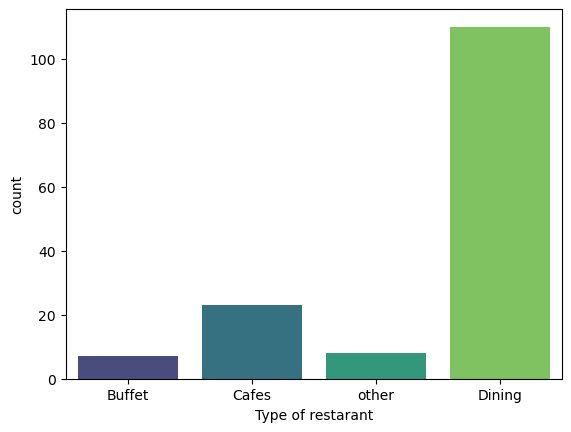

In [49]:
sns.countplot(x=dataframe['listed_in(type)'], hue=dataframe['listed_in(type)'], palette='viridis', legend=False)
plt.xlabel("Type of restarant")

## Conclusion: Dinning restaraunts are preferred by a larger number of individuals.

## Ratings of restaurant

Text(0, 0.5, 'votes')

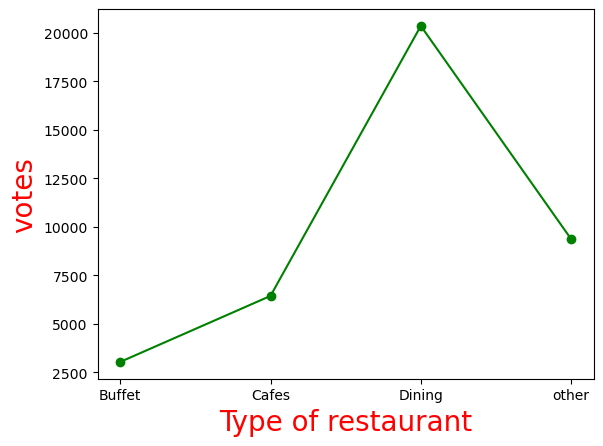

In [63]:
grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c="green", marker="o")
plt.xlabel("Type of restaurant", c="red", size=20)
plt.ylabel("votes", c="red", size=20)

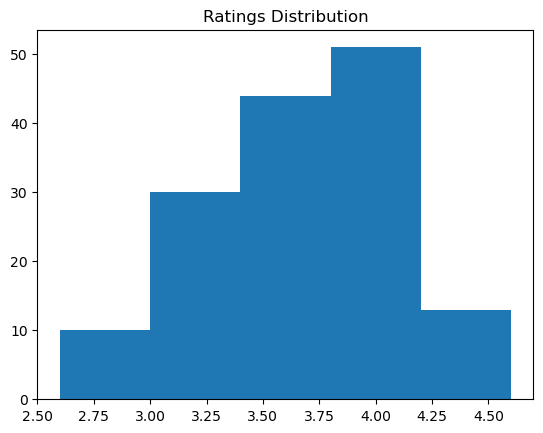

In [67]:
plt.hist(dataframe['rate'],bins=5)
plt.title("Ratings Distribution")
plt.show()

## Approximate cost of two people

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

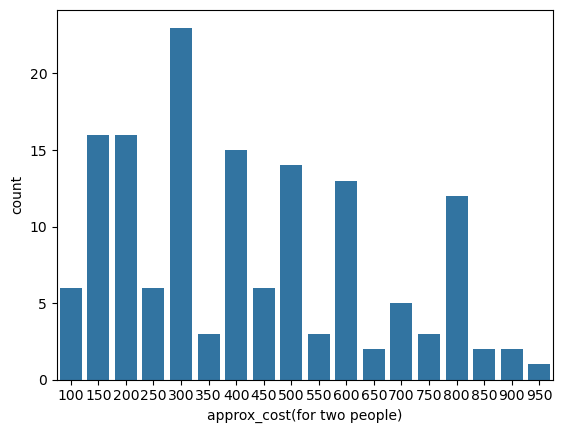

In [72]:
couple_data=dataframe['approx_cost(for two people)']
sns.countplot(x=couple_data)

Majority of couples prefer restaurants with an approximate cost of 300 rupees.

## Ratings of Online and Offline Orders

<Axes: xlabel='online_order', ylabel='rate'>

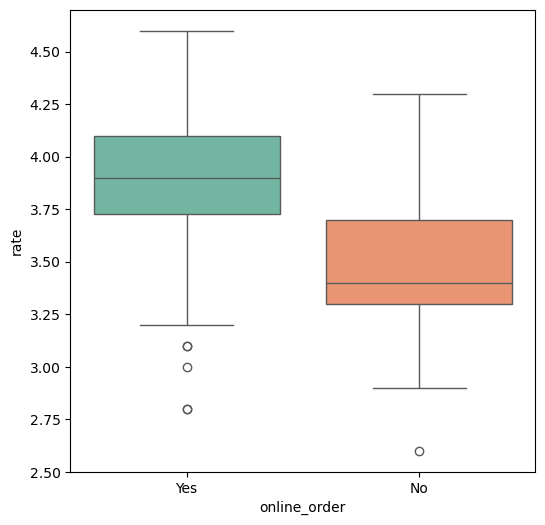

In [80]:
plt.figure(figsize = (6,6))
sns.boxplot(x='online_order', y='rate', hue='online_order', data=dataframe, palette='Set2', legend=False)

Online order receives higher rating than offline orders

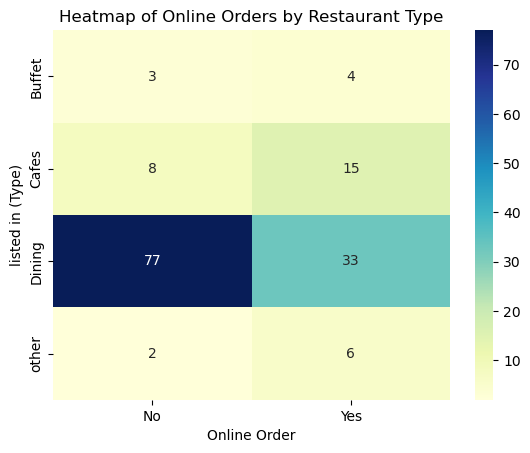

In [96]:
pivot_table = dataframe.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt='d')
plt.title("Heatmap of Online Orders by Restaurant Type")
plt.xlabel("Online Order")
plt.ylabel("listed in (Type)")
plt.show()

### Conclusion: Dinning restaurants primarily accept offline orders, whereas cafes primarily recieves online orders. This suggest that clients prefer to place orders in person at restaurants, but prefer online ordering at cafes.